# Lista 3

## Ćwiczenia

In [1]:
# wczytanie danych z naglowkami
kosiarki = read.table("dane_kosiarki-1.txt", header = TRUE)
# ukazanie pierwszych wierszy naszych danych
head(kosiarki)

,income,lotsize,owner
,<dbl>,<dbl>,<int>
1,20.0,9.2,1
2,28.5,8.4,1
3,21.6,10.8,1
4,20.5,10.4,1
5,29.0,11.8,1
6,36.7,9.6,1


#### i) Podział na dwie grupy zależne od zmiennej Y

In [2]:
# podzbior osob posiadajacych kosiarke (wartosc 1)
posiada_kosiarke = kosiarki[kosiarki$owner == 1, 1:2]

In [3]:
# podzbior osob nieposiadajacych kosiarke (wartosc 1)
brak_kosiarki = kosiarki[kosiarki$owner == 2, 1:2]

#### ii) Wykres grup

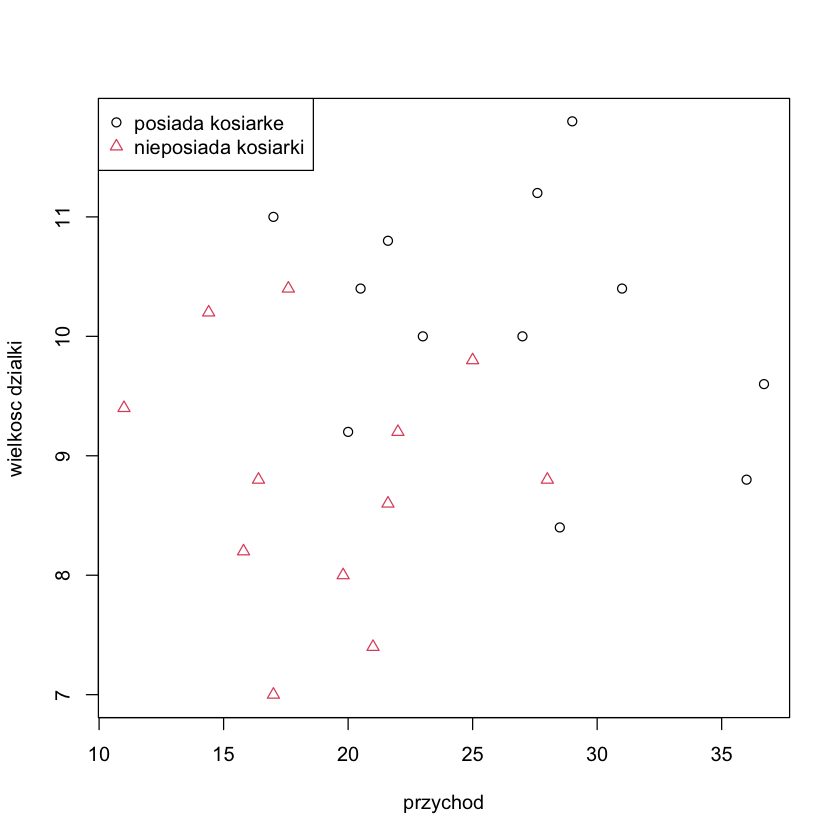

In [4]:
# zaleznosc pomiedzy przychodem a wielkoscia dzialki dla grup
# typ wykresu jest punktowy (type = "p")
# punkty zaznaczamy wzgledem wartosci w kolumnie owner (pch = kosiarki$owner), maja inny kolor (col = kosiarki$owner)
plot(kosiarki$income, kosiarki$lotsize, type = "p", xlab = "przychod", ylab = "wielkosc dzialki", pch = kosiarki$owner, col = kosiarki$owner)
legend("topleft", c("posiada kosiarke", "nieposiada kosiarki"), col = c(1, 2), pch = c(1, 2))

In [5]:
# mniejszy przychod wiaze sie z posiadaniem mniejszej dzialki, a to z brakiem kosiarki

#### iii) Liniowa funkcja klasyfikująca

##### 1.) Macierze dla osób posiadających i nieposiadających kosiarki

In [6]:
# macierz dla osob posiadajacych kosiarke
posiada_kosiarke

,income,lotsize
,<dbl>,<dbl>
1,20.0,9.2
2,28.5,8.4
3,21.6,10.8
4,20.5,10.4
5,29.0,11.8
6,36.7,9.6
7,36.0,8.8
8,27.6,11.2
9,23.0,10.0


In [7]:
# macierz dla osob nieposiadajacych kosiarke
brak_kosiarki

,income,lotsize
,<dbl>,<dbl>
13,25.0,9.8
14,17.6,10.4
15,21.6,8.6
16,14.4,10.2
17,28.0,8.8
18,19.8,8.0
19,22.0,9.2
20,15.8,8.2
21,11.0,9.4


##### 2.) Wektory wartości średnich w klasach, próbkowe macierze kowariancji, wspólna próbkowa macierz kowariancji dla obu klas

In [8]:
# srednie dla kolumn w obu grupach
srednia_posiada_kosiarke = colMeans(posiada_kosiarke)
srednia_brak_kosiarki = colMeans(brak_kosiarki)
srednia_posiada_kosiarke # = x1
srednia_brak_kosiarki # = x2

income  lotsize 
26.49167 10.13333

income   lotsize 
19.133333  8.816667

In [9]:
# macierze kowariancji dla obu grup
kowariancja_posiada_kosiarke = cov(posiada_kosiarke)
kowariancja_brak_kosiarki = cov(brak_kosiarki)
kowariancja_posiada_kosiarke # = s1
kowariancja_brak_kosiarki # = s2

,income,lotsize
income,39.182652,-1.969697
lotsize,-1.969697,1.020606


,income,lotsize
income,22.3006061,-0.4315152
lotsize,-0.4315152,1.1160606


In [10]:
# kowiarancja przychodu jest wieksza dla osob posiadajacych kosiarke
# kowiarancja wielkosci dzialki dla obu grup jest bardzo podobna

In [11]:
# wielkosc zbiorow danych
wielkosc_kosiarki = nrow(kosiarki)
wielkosc_posiada_kosiarke = nrow(posiada_kosiarke)
wielkosc_brak_kosiarki = nrow(brak_kosiarki)
wielkosc_kosiarki # = n
wielkosc_posiada_kosiarke # = n1
wielkosc_brak_kosiarki # = n2

[1] 24

[1] 12

[1] 12

In [12]:
# macierz kowariancji pomiedzy dwoma zbiorami
macierz_kowariancji = 1 / (wielkosc_kosiarki - 2) * ((wielkosc_posiada_kosiarke - 1) * kowariancja_posiada_kosiarke + (wielkosc_brak_kosiarki - 1) * kowariancja_brak_kosiarki)
macierz_kowariancji # = W

,income,lotsize
income,30.741629,-1.200606
lotsize,-1.200606,1.068333


In [13]:
# wartosci w macierzy kowiariancji pomiedzy dwoma zbiorami sa mniej wiecej srednia z obu macierzy dla osobnych grup

##### 3.) Macierz odwrotna do wspólnej macierzy kowariancji

In [14]:
# obliczenie macierzy odwrotnej
macierz_odwrotna = solve(macierz_kowariancji)
macierz_odwrotna # = invW

,income,lotsize
income,0.03402243,0.03823482
lotsize,0.03823482,0.97900620


##### 4.) Wyznaczenie prostej dyskryminacyjnej rodzielającej klasy

In [15]:
lewa_strona = t(srednia_posiada_kosiarke - srednia_brak_kosiarki) %*% macierz_odwrotna # = a
prawa_strona = t(srednia_posiada_kosiarke - srednia_brak_kosiarki) %*% macierz_odwrotna %*% (srednia_posiada_kosiarke + srednia_brak_kosiarki)/2 # = b
lewa_strona
prawa_strona

income,lotsize
0.3006909,1.570369


21.73876


In [16]:
# po lewej stronie rownania otrzymujemy macierz z 1 wierszem i 2 kolumnami
# po prawej stronie rownania otrzymujemy srednia

In [17]:
# przyklad z przychodem wynoszacym 22.8 oraz dzialka o wielkosci 9.4
# sprawdzamy czy wedlug naszego modelu osoba posiada czy tez nieposiada kosiarki
przykladowy_punkt = matrix(c(22.8, 9.4), 2, 1)
# mnozymy lewa strone rownania przez przykladowy punkt i sprawdzamy czy jest wieksza od prawej strony
lewa_strona %*% przykladowy_punkt > prawa_strona

FALSE


In [18]:
# osoba z przychodem wynoszacym 22.8 oraz dzialka o wielkosci 9.4 nie posiada kosiarki

In [19]:
# chcemy znac przebieg naszej prostej i w jaki sposob dzieli ona nasze punkty

In [20]:
lewa_strona
prawa_strona

income,lotsize
0.3006909,1.570369


21.73876


In [21]:
# macierz po lewej stronie zlozona jest z 2 elementow - a1 i a2
# mnozymy ja przez punkt x z dwoma wspolrzednymi - jest to macierz o 2 wierszach i 1 kolumnie
# sprawdzamy czy ten iloczyn jest wiekszy niz wartosc po prawej stronie

$[a_{1}, a_{2}]\cdot [x, y]^{T} > b$

In [22]:
# mnozymy wartosci po lewej stronie

$a_{1}\cdot x + a_{2}\cdot y > b$

In [23]:
# wyznaczamy wzor na prosta - odejmujemy stronami (a1 * x)

$a_{2}\cdot y > -a_{1}\cdot x + b$

In [24]:
# dzielimy wszystko przez wartosci a2

$y > -\frac{a_{1}}{a_{2}}x + \frac{b}{a_{2}}$

In [25]:
# wyznaczamy parametry dotyczace nowego punktu
wartosc_a = 0.3006909 / 1.570369
wartosc_b = 21.73876 / 1.570369
wartosc_a
wartosc_b

[1] 0.1914779

[1] 13.84309

##### 5.) Prosta dyskryminacyjna na wykresie

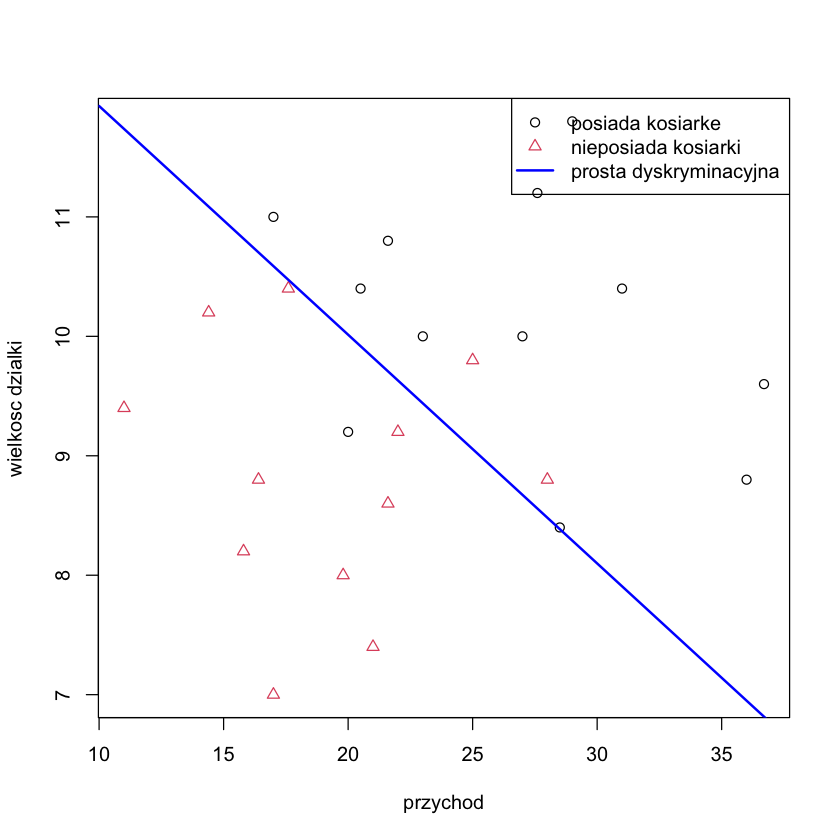

In [26]:
# wczesniej sporzadzony wykres zaleznosci przychodu od wielkosci dzialki
plot(kosiarki$income, kosiarki$lotsize, type = "p", xlab = "przychod", ylab = "wielkosc dzialki", pch = kosiarki$owner, col = kosiarki$owner)
# narysowanie prostej dyskryminacyjnej w zakresie 1-40 (tak jak wartosci zmiennych na osi OX) o grubosci 2 i kolorze niebieskim
lines(10:40, -wartosc_a * (10:40) + wartosc_b, lwd = 2, col = "blue")
# dodanie legendy
legend("topright", c("posiada kosiarke", "nieposiada kosiarki", "prosta dyskryminacyjna"), col = c(1, 2, "blue"), pch = c(1, 2, NA), lty = c(NA, NA, 1), lwd = c(1, 1, 2))

In [27]:
# sprawdzamy blad
# mozemy zauwazyc ze 1 osoba posiadajaca kosiarke i 2 osoby nieposiadajace kosiarki znajduja sie po niepoprawnych stronach wykresu (lub na linii)

In [28]:
# obliczenie procentu popelnianego bledu
blad_predykcji = (3 / 24) * 100
blad_predykcji

[1] 12.5

In [29]:
# obliczenie procentu poprawnie sklasyfikowanych obiektow
poprawna_predykcja = 100 - blad_predykcji
poprawna_predykcja

[1] 87.5

## Zadanie 5

In [30]:
# wczytanie pakietu MASS
library(MASS)

In [31]:
# utworzenie modelu zaleznosci posiadania kosiarki od wielkosci dzialki i przychodu
# prawdopodobienstwa a priori przynaleznosci do klas przyjmujemy jako 0.5 (prior = c(0.5, 0.5))
model_lda_5_1 = lda(owner ~ lotsize + income, data = kosiarki, prior = c(0.5, 0.5))
model_lda_5_1

Call:
lda(owner ~ lotsize + income, data = kosiarki, prior = c(0.5, 
    0.5))

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    lotsize   income
1 10.133333 26.49167
2  8.816667 19.13333

Coefficients of linear discriminants:
               LD1
lotsize -0.7590457
income  -0.1453404

In [32]:
# jezeli nie damy parametru prior dotyczacego prawdopodobienstwa a priori przynaleznosci do klas, to zostanie ono wyliczone w opariu o dane
model_lda_5_2 = lda(owner ~ lotsize + income, data = kosiarki)
model_lda_5_2

Call:
lda(owner ~ lotsize + income, data = kosiarki)

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
    lotsize   income
1 10.133333 26.49167
2  8.816667 19.13333

Coefficients of linear discriminants:
               LD1
lotsize -0.7590457
income  -0.1453404

In [33]:
# w obu przypadkach prawdopodobienstwo a priori przynaleznosci do klas jest takie samo, poniewaz polowa osob posiada kosiarke, a polowa nie

#### i) U osób posiadających kosiarkę średnia wielkość działki to 10.133333 a średni przychód wynosi 26.49167
#### U osób nieposiadających kosiarki średnia wielkość działki to 8.816667 a średni przychód wynosi 19.13333

#### ii) Wartości współczynników funkcji dyskryminacyjnej wynoszą odpowiednio -0.7590457 dla wielkości działki oraz -0.1453404 dla przychodu

#### iii) Mamy tylko jedną funkcję dyskryminacyjną, dlatego nie można ich porównać celem określenia, która ze zmiennych objaśniających jest najbardziej istotna

#### iv) Średnia wartość funkcji dyskryminacyjnej

In [34]:
# predykcja wartosci na podstawie naszego modelu
predykcja_5 = predict(model_lda_5_1)$x[, 1]
# srednia wartosc funkcji dyskryminacyjnej dla grupy posiadajacej kosiarke
srednia_funkcja_posiadajacy_kosiarke = sum(predykcja_5 * (kosiarki$owner == 1)) / sum(kosiarki$owner == 1)
srednia_funkcja_posiadajacy_kosiarke
# srednia wartosc funkcji dyskryminacyjnej dla grupy nieposiadajacej kosiarki
srednia_funkcja_nieposiadajacy_kosiarki = sum(predykcja_5 * (kosiarki$owner == 2)) / sum(kosiarki$owner == 2)
srednia_funkcja_nieposiadajacy_kosiarki

[1] -1.034437

[1] 1.034437

In [35]:
# obie wartosci sa wzgledem siebie przeciwstawne
# jedna wartosc jest ujemna, a druga dodatnia - funkcja dyskryminacyjna zapewne jest wlasciwa (dobrze wplywa na rozdzial zmiennych)

In [36]:
# relatywna wartosc funkcji dyskryminujacej - wartosc singularna
model_lda_5_1$svd

[1] 5.067684

#### v) Predykcja przynależności do klas zbioru testowego

In [37]:
# predykcja przenaleznosci do klas
predict(model_lda_5_1)

,1,2
1,0.217968446,0.78203155
2,0.505507885,0.49449211
3,0.847632493,0.15236751
4,0.680755073,0.31924493
5,0.995976750,0.00402325
6,0.987533203,0.01246680
7,0.948110866,0.05188913
8,0.984456467,0.01554353
9,0.706992840,0.29300716
10,0.980439689,0.01956031


In [38]:
# obserwacje klasyfikujemy do klas zgodnie z wieksza wartoscia prawdopodobienstwa a posteriori w odpowiedniej kolumnie
# ponizej mamy wartosci funkcji dyskryminacyjnej dla kazdej obserwacji

#### vi) Predykcja przynależności do klas dla dwudziestej obserwacji

In [39]:
# prawdopodobienstwa a posteriori przynaleznosci 20. obserwacji do klas
predict(model_lda_5_1)$posterior[20,]

1          2 
0.01612995 0.98387005

#### vii) Obserwacja dwudziesta jest zakwalifikowana do klasy 2.

#### viii) Procent właściwie zaklasyfikowanych obiektów

In [40]:
# utworzenie tabeli predykcji - porownanie wartosci rzeczywistych z przypuszczalnymi
tabela_predykcji_5_1 = table(True = kosiarki$owner, Predicted = predict(model_lda_5_1)$class)

In [41]:
# procent niepoprawnie zaklasyfikowanych obiektow 
blad_5_1 = (sum(tabela_predykcji_5_1) - sum(diag(tabela_predykcji_5_1))) / sum(tabela_predykcji_5_1) * 100
blad_5_1

[1] 12.5

In [42]:
# procent poprawnie zaklasyfikowanych obiektow
poprawne_5_1 = 100 - blad_5_1
poprawne_5_1

[1] 87.5

#### ix) Tabela predykcji

In [43]:
# przedstawienie tabeli predykcji
tabela_predykcji_5_1

    Predicted
True  1  2
   1 11  1
   2  2 10

In [44]:
# 11 z 12 obserwacji zostalo zaklasyfikowanych poprawnie do klasy 1.
# 10 z 12 obserwacji zostalo zaklasyfikowanych poprawnie do klasy 2.